# Predict Survival on the Titanic

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.preprocessing import StandardScaler


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Load Data

In [2]:
df = pd.read_csv('/content/train.csv')

# Data Explore

In [3]:
df.shape

(891, 12)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [7]:
round(df.describe(),2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [8]:
df.duplicated().sum()

0

# Data Preprocessing

# Act With Missing Data

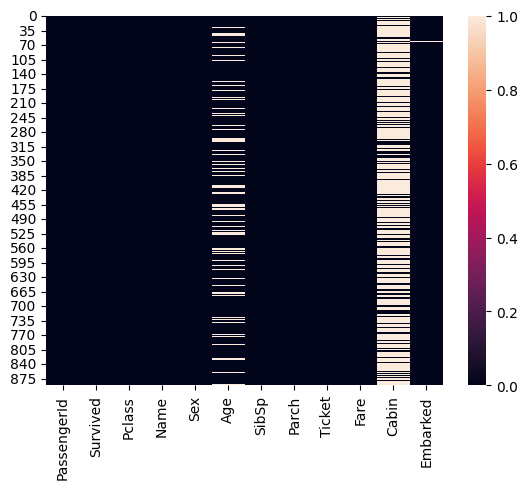

In [9]:
sns.heatmap(df.isnull());


In [10]:
df['Age'] = round((df['Age'].fillna(df['Age'].mean())) , 0)

In [11]:
df['Age']

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,30.0
889,26.0


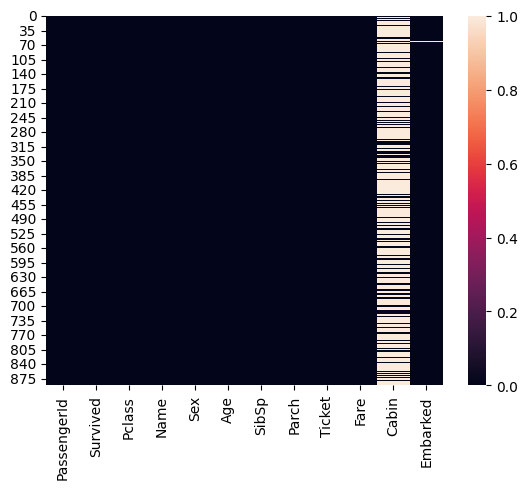

In [12]:
sns.heatmap(df.isnull());

In [13]:
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode()[0])

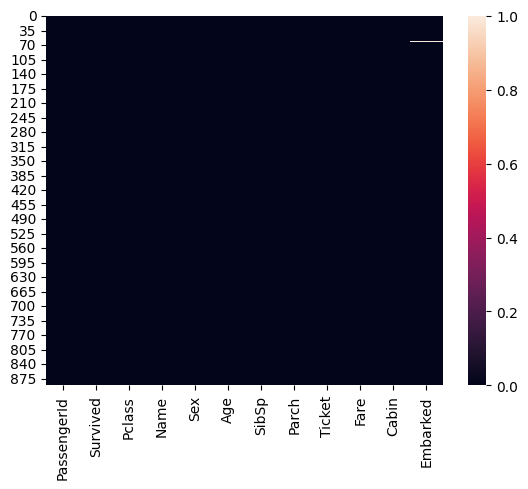

In [14]:
sns.heatmap(df.isnull());

In [15]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

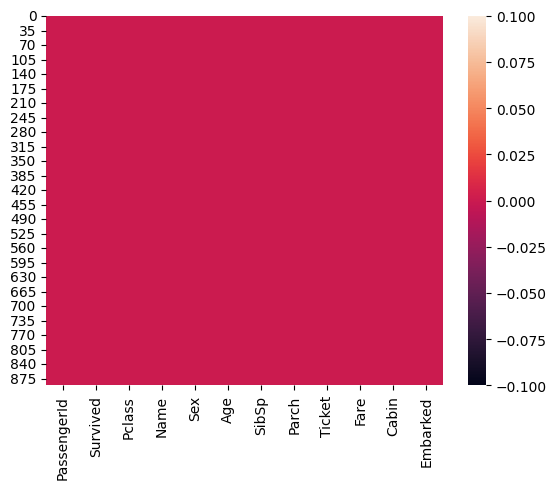

In [16]:
sns.heatmap(df.isnull());

In [17]:
df['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [18]:
df['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [19]:
df['Embarked'].value_counts()

,count
Embarked,
S,646
C,168
Q,77


# Encode Cols

In [20]:
le = LabelEncoder()

In [21]:
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])
df['Cabin'] = le.fit_transform(df['Cabin'])

In [22]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,47,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,47,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,47,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,47,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,30,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,30.0,1,2,W./C. 6607,23.4500,47,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,60,0


# Drop Columns

In [23]:
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)


In [24]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,47,2
1,1,1,0,38.0,1,0,71.2833,81,0
2,1,3,0,26.0,0,0,7.9250,47,2
3,1,1,0,35.0,1,0,53.1000,55,2
4,0,3,1,35.0,0,0,8.0500,47,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,47,2
887,1,1,0,19.0,0,0,30.0000,30,2
888,0,3,0,30.0,1,2,23.4500,47,2
889,1,1,1,26.0,0,0,30.0000,60,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    int64  
 8   Embarked  891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


# Exploratory Data Analysis

<ipython-input-26-496aaf46b1ae>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df , palette='viridis')


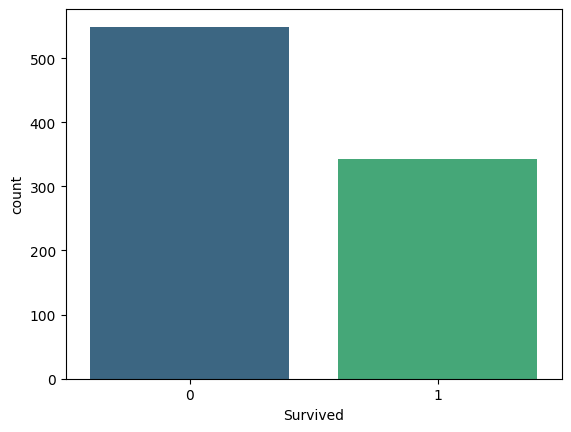

In [26]:
sns.countplot(x='Survived', data=df , palette='viridis')
plt.show()

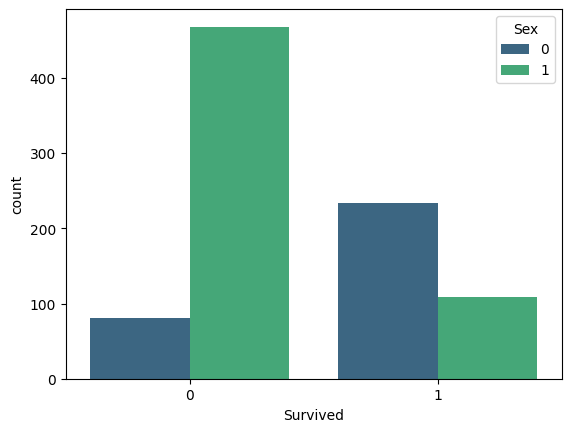

In [27]:
sns.countplot(x='Survived', data=df , hue='Sex', palette='viridis')
plt.show()

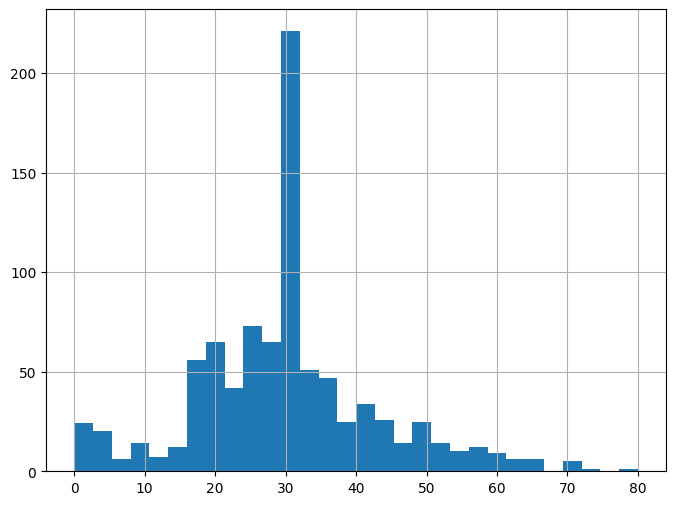

In [28]:
df['Age'].hist(figsize=(8,6), bins=30)
plt.show()

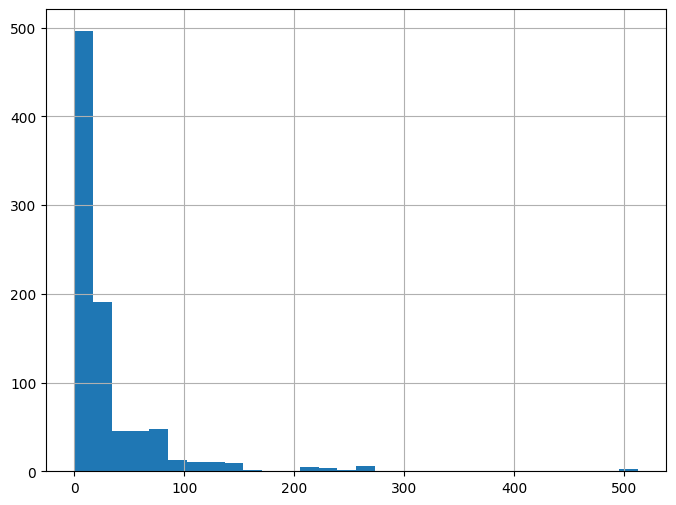

In [29]:
df['Fare'].hist(figsize=(8,6), bins=30)
plt.show()

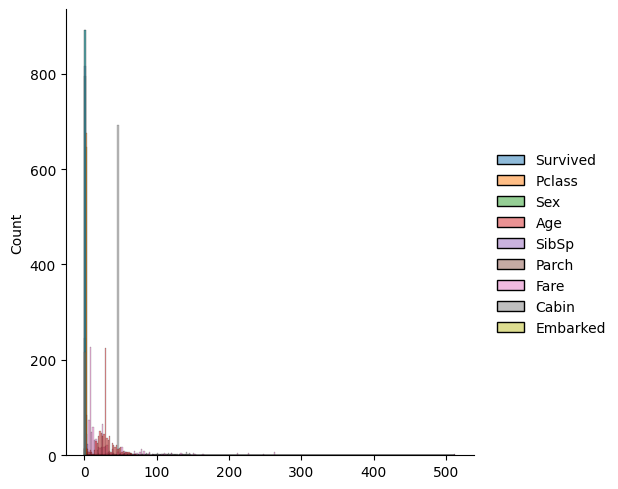

In [30]:
sns.displot(df);

# Spliting Data

In [31]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [32]:
x_train , x_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [33]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 8)
(179, 8)
(712,)
(179,)


# Model Building

# Logistic Regression


In [34]:
lr = LogisticRegression(max_iter=10000)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [35]:
lr.score(x_train,y_train)

0.8047752808988764

In [36]:
lr_pred = lr.predict(x_test)

# Model Evaluation

In [37]:
accuracy_score(y_test,lr_pred)

0.8100558659217877

In [38]:
confusion_matrix(y_test,lr_pred)

array([[90, 15],
       [19, 55]])

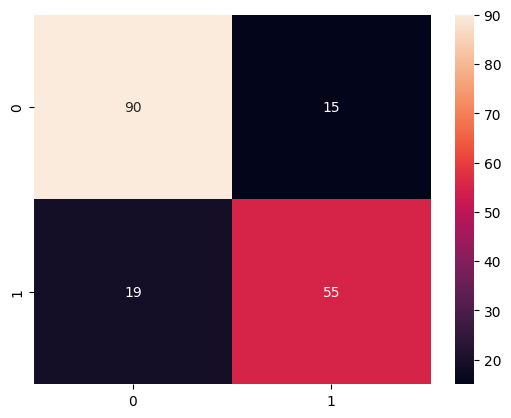

In [39]:
sns.heatmap(confusion_matrix(y_test,lr_pred),annot=True,fmt='d')
plt.show()

In [40]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [41]:
lr.coef_

array([[-0.86055999, -2.60701233, -0.03101217, -0.30266395, -0.12818569,
         0.00280692,  0.00946598, -0.24275139]])

In [42]:
lr.intercept_

array([3.96000052])

# Save Model

In [43]:
import pickle as pk
model = open('model.pkl','wb')
pk.dump(lr,model)
model.close()

# Load Test Data To Appy the Model

In [44]:
test_data = pd.read_csv('/content/test.csv')

In [45]:
test_data = test_data.drop(['PassengerId','Name','Ticket'],axis=1)


In [46]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Cabin     91 non-null     object 
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 26.3+ KB


In [47]:
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mean())
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())

In [48]:
test_data['Sex'] = le.fit_transform(test_data['Sex'])
test_data['Embarked'] = le.fit_transform(test_data['Embarked'])
test_data['Cabin'] = le.fit_transform(test_data['Cabin'])

In [49]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Cabin     418 non-null    int64  
 7   Embarked  418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.3 KB


# Predict Test Data

# Load Model

In [50]:
with open('/content/model.pkl','rb') as f:
  model = pk.load(f)

In [51]:
result = model.predict(test_data)

In [52]:
result

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [53]:
result_df = pd.DataFrame(result,columns=['Survived'])

In [54]:
result_df

,Survived
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


# Save Result in CSV File

In [55]:
pd.DataFrame(result_df).to_csv('result.csv')

# Train Other Models And Compare Final Results

# SVC Model

In [56]:
svc = SVC()
svc.fit(x_train,y_train)

SVC()

In [57]:
svc.score(x_train,y_train)

0.6966292134831461

In [58]:
svc_pred = svc.predict(x_test)

In [59]:
confusion_matrix(y_test,svc_pred)

array([[95, 10],
       [44, 30]])

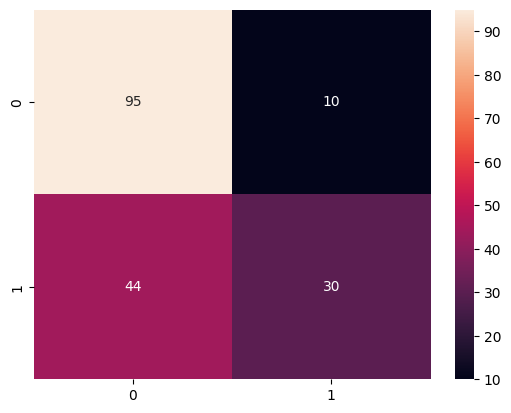

In [60]:
sns.heatmap(confusion_matrix(y_test,svc_pred),annot=True,fmt='d')
plt.show()

# KNeighborsClassifier Model

In [61]:
KN = KNeighborsClassifier(n_neighbors=1)
KN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [62]:
KN.score(x_train,y_train)

0.9775280898876404

In [63]:
KN_pred = KN.predict(x_test)

In [64]:
confusion_matrix(y_test,KN_pred)

array([[87, 18],
       [37, 37]])

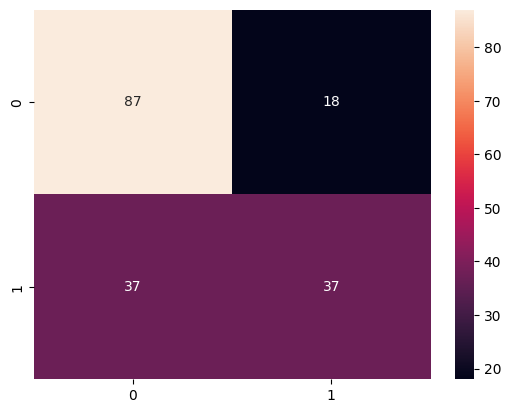

In [65]:
sns.heatmap(confusion_matrix(y_test,KN_pred),annot=True,fmt='d')
plt.show()

# DecisionTreeClassifier Model

In [66]:
DC = DecisionTreeClassifier()
DC.fit(x_train,y_train)

DecisionTreeClassifier()

In [67]:
DC.score(x_train,y_train)

0.9831460674157303

In [68]:
DC_pred = DC.predict(x_test)

In [69]:
confusion_matrix(y_test,DC_pred)

array([[85, 20],
       [21, 53]])

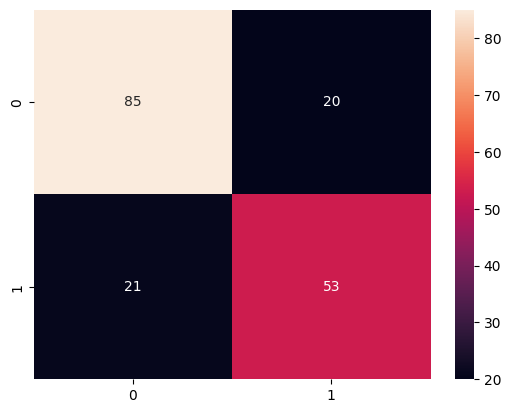

In [70]:
sns.heatmap(confusion_matrix(y_test,DC_pred),annot=True,fmt='d')
plt.show()

# RandomForestClassifier Model

In [71]:
RF = RandomForestClassifier()
RF.fit(x_train,y_train)

RandomForestClassifier()

In [72]:
RF.score(x_train,y_train)

0.9831460674157303

In [73]:
RF_pred = RF.predict(x_test)

In [74]:
confusion_matrix(y_test,RF_pred)

array([[89, 16],
       [21, 53]])

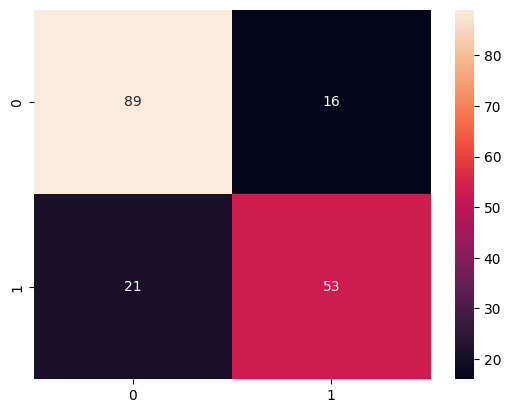

In [75]:
sns.heatmap(confusion_matrix(y_test,RF_pred),annot=True,fmt='d')
plt.show()

# GradientBoostingClassifier Model

In [76]:
GB = GradientBoostingClassifier(n_estimators=10000)
GB.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=10000)

In [77]:
GB.score(x_train,y_train)

0.9831460674157303

In [78]:
GB_pred = GB.predict(x_test)

In [79]:
confusion_matrix(y_test,GB_pred)

array([[86, 19],
       [19, 55]])

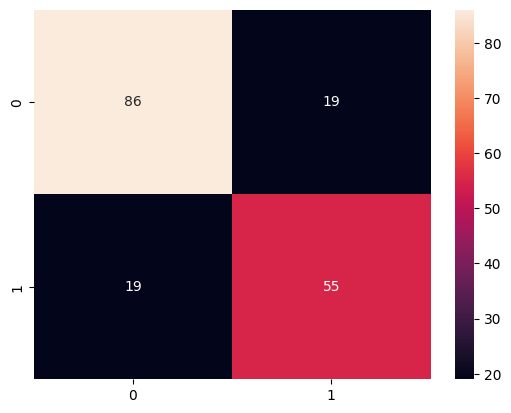

In [80]:
sns.heatmap(confusion_matrix(y_test,GB_pred),annot=True,fmt='d')
plt.show()

# Data Frame for results of All Models

In [81]:
models = ['Logistic Regression','SVC','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier']
score1 = lr.score(x_train,y_train)
score2 = svc.score(x_train,y_train)
score3 = KN.score(x_train,y_train)
score4 = DC.score(x_train,y_train)
score5 = RF.score(x_train,y_train)
score6 = GB.score(x_train,y_train)
scores = [score1,score2,score3,score4,score5,score6]

accuracy1 = accuracy_score(y_test,lr_pred)
accuracy2 = accuracy_score(y_test,svc_pred)
accuracy3 = accuracy_score(y_test,KN_pred)
accuracy4 = accuracy_score(y_test,DC_pred)
accuracy5 = accuracy_score(y_test,RF_pred)
accuracy6 = accuracy_score(y_test,GB_pred)
accuracies = [accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6]


In [82]:
Model_Data = pd.DataFrame({'Model':models,
                           'Accuracy':accuracies,
                           'Score': scores})

In [83]:
Model_Data

,Model,Accuracy,Score
0,Logistic Regression,0.810056,0.804775
1,SVC,0.698324,0.696629
2,KNeighborsClassifier,0.692737,0.977528
3,DecisionTreeClassifier,0.770950,0.983146
4,RandomForestClassifier,0.793296,0.983146
5,GradientBoostingClassifier,0.787709,0.983146
